# Monte Carlo sampling
### This notebook contains the code to generate the dataset, plot the required histograms and finally apply smearing.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from generator import generate_dataset, smear_energy, smear_angles
from convertors import momentums_to_angles

#### Notebook environment setup

In [2]:
%matplotlib inline
pd.options.display.max_columns = 12
np.random.seed(111)

#### Defining basic values

In [3]:
E1 = 200
E2 = 200
E_tot = E1 + E2
M_max = 114
num_of_samples = 100000

### Generating dataset

In [4]:
dataset = generate_dataset(E_tot, M_max, num_of_samples)

In [5]:
dataset.shape

(100000, 10)

### Plot energies (E)

Text(0, 0.5, 'Occurrences')

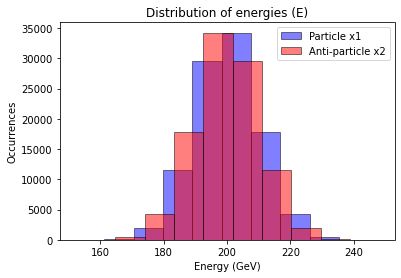

In [6]:
plt.hist(dataset[:, 0], edgecolor='black', color='blue', alpha=0.5)
plt.hist(dataset[:, 5], edgecolor='black', color='red', alpha=0.5)
plt.title('Distribution of energies (E)')
plt.legend(['Particle x1', 'Anti-particle x2'], loc=1)
plt.xlabel('Energy (GeV)')
plt.ylabel('Occurrences')

#### Exrtact phis and thetas to plot the required histograms

In [7]:
phis1, thetas1, _ = momentums_to_angles(dataset[:, 1], dataset[:, 2], dataset[:, 3])
phis2, thetas2, _ = momentums_to_angles(dataset[:, 6], dataset[:, 7], dataset[:, 8])

#### Convert radians to degrees for being conceptually easier to understand

In [8]:
phis1 = np.rad2deg(phis1)
phis2 = np.rad2deg(phis2)
thetas1 = np.rad2deg(thetas1)
thetas2 = np.rad2deg(thetas2)

### Plot phis (φ)

Text(0, 0.5, 'Occurrences')

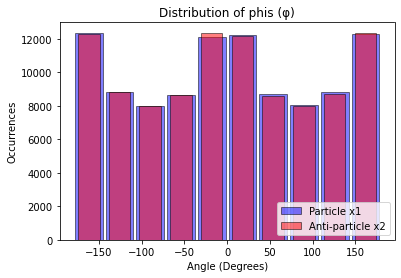

In [9]:
plt.hist(phis1, edgecolor='black', color='blue', rwidth=0.9, alpha=0.5)
plt.hist(phis2, edgecolor='black', color='red', rwidth=0.7, alpha=0.5)
plt.title('Distribution of phis (φ)')
plt.legend(['Particle x1', 'Anti-particle x2'], loc=4)
plt.xlabel('Angle (Degrees)')
plt.ylabel('Occurrences')

### Plot thetas (θ)

In [10]:
plt.hist(thetas1, edgecolor='black', color='blue', rwidth=0.9, alpha=0.5)
plt.hist(thetas2, edgecolor='black', color='red', rwidth=0.9, alpha=0.5)
plt.title('Distribution of thetas (θ)')
plt.legend(['Particle x1', 'Anti-particle x2'], loc=4)
plt.xlabel('Angle (Degrees)')
plt.ylabel('Occurrences')

Text(0, 0.5, 'Occurrences')

### Plot mass (m)

In [11]:
plt.hist(dataset[:, 4], color='blue')
plt.title('Distribution of mass (m)')
plt.xlabel('Mass (GeV/c^2)')
plt.ylabel('Occurrences')

Text(0, 0.5, 'Occurrences')

### Plot the relativistic dispersion relation

Text(0, 0.5, 'Momentum (GeV/c)')

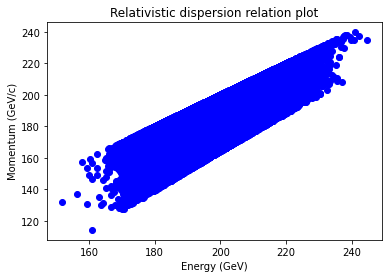

In [12]:
total_momentum = np.sqrt(np.square(dataset[:, 1]) + np.square(dataset[:, 2]) + np.square(dataset[:, 3]))

plt.scatter(dataset[:, 0], total_momentum, c='blue')
plt.title('Relativistic dispersion relation plot')
plt.xlabel('Energy (GeV)')
plt.ylabel('Momentum (GeV/c)')

### Fit the points in a linear regression model and calculate Mean Square Error as a figure of merit

In [13]:
poly1d_fn = np.poly1d(np.polyfit(dataset[:, 0], total_momentum, 1))

plt.plot(dataset[:, 0], total_momentum, 'bo', dataset[:, 0], poly1d_fn(dataset[:, 0]), '--r')
plt.title('Relativistic dispersion relation plot w/ fitted linear model')
plt.xlabel('Energy (GeV)')
plt.ylabel('Momentum (GeV/c)')

Text(0, 0.5, 'Momentum (GeV/c)')

In [14]:
print(poly1d_fn)

 
1.063 x - 24.06


In [15]:
a = poly1d_fn[1]
b = 1
c = poly1d_fn[0]

In [16]:
def shortest_distance(xs, ys, a, b, c):
    d = np.abs((a * xs + b * ys + c)) / (np.sqrt(a * a + b * b))
    return d

In [17]:
def rmse(data):
    return np.sqrt(np.sum(np.divide(np.power(data, 2), data.shape[0])))

In [18]:
ds = shortest_distance(dataset[:, 0], total_momentum, a, b, c)
print('Root Mean Squared Error is: ', rmse(ds))

Root Mean Squared Error is:  258.863487206439


### Apply smearing to angles and energy

In [19]:
dataset = smear_energy(dataset, num_of_samples)

In [20]:
smeared_dataset = smear_angles(dataset)

### Plot energies (E)

In [21]:
plt.hist(dataset[:, 0], edgecolor='black', color='blue', rwidth=0.9, alpha=0.5)
plt.hist(dataset[:, 5], edgecolor='black', color='red', rwidth=0.7, alpha=0.5)
plt.title('Distribution of smeared energies (E)')
plt.legend(['Particle x1', 'Anti-particle x2'], loc=1)
plt.xlabel('Energy (GeV)')
plt.ylabel('Occurrences')

Text(0, 0.5, 'Occurrences')

#### Create final dataset & export to csv

In [22]:
df = pd.DataFrame(dataset, columns=['E1', 'p_x1', 'p_y1', 'p_z1', 'm1',
                                    'E2', 'p_x2', 'p_y2', 'p_z2', 'm2'])

df.insert(0, 'event_id', range(1, 1 + len(df)))

df.to_csv('./Data/monte_carlo_dataset.csv', index=False)

print('A sample of our dataset:')
df.head(10)

A sample of our dataset:


event_id          E1        p_x1        p_y1        p_z1          m1  \
0         1  202.997948   92.836726  -62.466442  143.531652   49.710728   
1         2  220.655725 -104.416111  -41.910415  163.088608   47.905592   
2         3  196.772182  -82.686078   -1.096995  170.608852   70.821693   
3         4  173.230048   91.037701   90.578407  103.140344  102.688256   
4         5  228.006597 -191.117258   17.587761   78.452390   48.030238   
5         6  220.479677   19.252780  -81.240870  167.261524   79.540962   
6         7  214.532932   82.260258  -59.916435  162.108192   46.173082   
7         8  203.512409  159.054644   68.047439   92.536417  107.983289   
8         9  195.307395  -84.615747 -170.903697   59.024966   47.535616   
9        10  216.429867 -185.483026  -16.947872   70.798734   14.587533   

           E2        p_x2        p_y2        p_z2          m2  
0  202.997948  -92.836726   62.466442 -143.531652   49.710728  
1  220.655725  104.416111   41.910415 -163.088608   47.905592  
2  196.772182   82.686078    1.096995 -170.608852   70.821693  
3  173.230048  -91.037701  -90.578407 -103.140344  102.688256  
4  228.006597  191.117258  -17.587761  -78.452390   48.030238  
5  220.479677  -19.252780   81.240870 -167.261524   79.540962  
6  214.532932  -82.260258   59.916435 -162.108192   46.173082  
7  203.512409 -159.054644  -68.047439  -92.536417  107.983289  
8  195.307395   84.615747  170.903697  -59.024966   47.535616  
9  216.429867  185.483026   16.947872  -70.798734   14.587533

Text(0, 0.5, 'Momentum (GeV/c)')

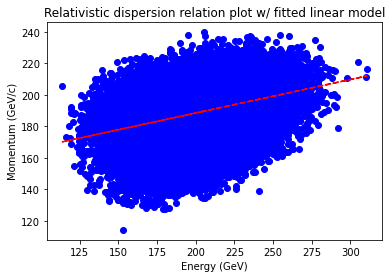

In [23]:
total_momentum = np.sqrt(np.square(df['p_x1']) + np.square(df['p_y1']) + np.square(df['p_z1']))
poly1d_fn = np.poly1d(np.polyfit(df['E1'], total_momentum, 1))

plt.plot(df['E1'], total_momentum, 'bo', df['E1'], poly1d_fn(df['E1']), '--r')
plt.title('Relativistic dispersion relation plot w/ fitted linear model')
plt.xlabel('Energy (GeV)')
plt.ylabel('Momentum (GeV/c)')

In [24]:
a = poly1d_fn[1]
b = 1
c = poly1d_fn[0]

ds = shortest_distance(df['E1'], total_momentum, a, b, c)
print('Root Mean Squared Error is: ', rmse(ds))

Root Mean Squared Error is:  369.2170540279022
